In [5]:
import pandas as pd
import numpy as np
#import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline
low_memory=False

path = input("Enter path to B-SOID ouput pose labels file:")
file = input("Enter filename:")

df = pd.read_csv(path + "/" + file)

#fig = px.line(df, x = 'Frame', y = 'Labels', title='B-SOID labels over time')
#fig.show()

Enter path to B-SOID ouput pose labels file: C:\Users\McCormick Lab\Documents\Python\neurobehavioral_cluster_alignment\3056_200924_E235_0
Enter filename: Apr-20-2022labels_pose_30Hz3056_200924_E235_0_rt_90min_cropDLC_resnet50_Sept17_rtSep17shuffle1_500000.csv


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [10]:
num_motifs=max(df.Labels)+1
df
#print(num_motifs)

,Frame,Labels,scorer,DLC_resnet50_Sept17_rtSep17shuffle1_500000,DLC_resnet50_Sept17_rtSep17shuffle1_500000.1,DLC_resnet50_Sept17_rtSep17shuffle1_500000.2,DLC_resnet50_Sept17_rtSep17shuffle1_500000.3,DLC_resnet50_Sept17_rtSep17shuffle1_500000.4,DLC_resnet50_Sept17_rtSep17shuffle1_500000.5,DLC_resnet50_Sept17_rtSep17shuffle1_500000.6,...,DLC_resnet50_Sept17_rtSep17shuffle1_500000.74,DLC_resnet50_Sept17_rtSep17shuffle1_500000.75,DLC_resnet50_Sept17_rtSep17shuffle1_500000.76,DLC_resnet50_Sept17_rtSep17shuffle1_500000.77,DLC_resnet50_Sept17_rtSep17shuffle1_500000.78,DLC_resnet50_Sept17_rtSep17shuffle1_500000.79,DLC_resnet50_Sept17_rtSep17shuffle1_500000.80,DLC_resnet50_Sept17_rtSep17shuffle1_500000.81,DLC_resnet50_Sept17_rtSep17shuffle1_500000.82,DLC_resnet50_Sept17_rtSep17shuffle1_500000.83
0,0,5,bodyparts,headpost1,headpost1,headpost1,headpost2,headpost2,headpost2,headpost3,...,eyeAnt,earAnt,earAnt,earAnt,earDors,earDors,earDors,noseTip,noseTip,noseTip
1,1,5,coords,x,y,likelihood,x,y,likelihood,x,...,likelihood,x,y,likelihood,x,y,likelihood,x,y,likelihood
2,2,5,0,218.0756226,20.73623657,0.99998498,510.2526245,104.9603043,0.999927878,953.2924194,...,0.999979198,406.1621094,169.7471771,0.999971628,249.3058929,54.20970154,0.999890327,944.6894531,245.2955627,0.999967396
3,3,5,1,218.0460968,21.06317139,0.99998498,510.5524597,105.2032089,0.999946475,954.4927979,...,0.999980092,405.8007507,169.8594513,0.999970078,249.3941956,54.55666733,0.999922395,944.1348267,245.421524,0.999956965
4,4,5,2,217.8128967,20.92719078,0.999984145,510.2062988,105.3143692,0.999938846,954.5853882,...,0.999977529,405.4801941,169.9324646,0.999972403,249.5863953,54.7477951,0.99991715,944.6408081,245.5987549,0.999969125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161997,161997,9,161995,216.227539,22.048285,0.999993,513.456848,110.304329,0.999991,954.998413,...,0.999942,428.872375,169.625702,0.999907,280.632538,62.94857,0.999979,943.256348,244.483719,0.999982
161998,161998,9,161996,217.042404,22.057642,0.999993,513.620911,110.281364,0.999991,955.012146,...,0.999942,429.034332,170.021057,0.999915,281.077728,62.492821,0.999968,942.927795,244.71579,0.999982
161999,161999,9,161997,216.411133,22.043144,0.999995,513.626709,110.201233,0.999991,955.005249,...,0.999942,429.105102,170.106506,0.999903,281.018829,62.489174,0.999968,942.886108,244.692978,0.999982
162000,162000,9,161998,216.700714,22.341278,0.999994,513.660217,110.184105,0.999991,955.005249,...,0.999942,428.996674,170.105911,0.999909,280.992798,62.530926,0.99997,942.912598,244.664261,0.999983


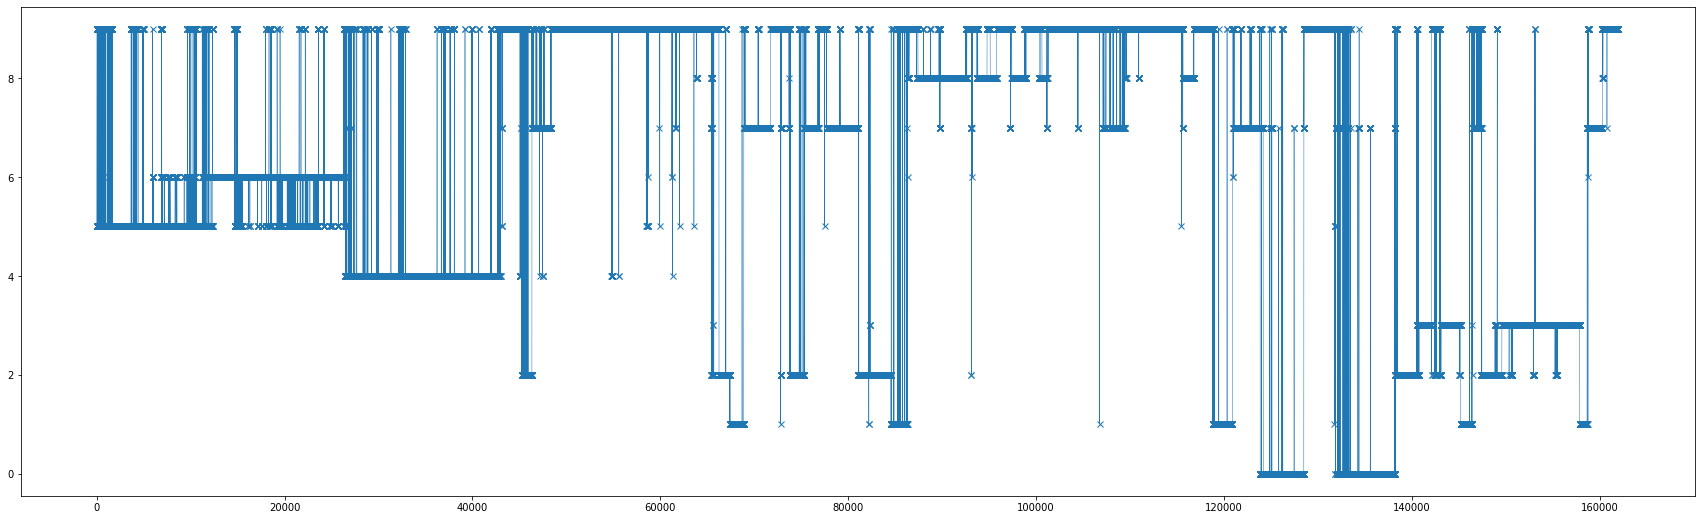

In [11]:
plt.rcParams["figure.figsize"] =(30,9) 
plt.plot(df.Frame,df.Labels,linewidth=0.5,marker="x")

motif_cnt=np.zeros((num_motifs),dtype=int)
for i in range(0,len(df.Labels)):
    motif_cnt[df.Labels[i]]=motif_cnt[df.Labels[i]]+1

In [12]:
from scipy.ndimage.filters import gaussian_filter1d
lab_raw = df.Labels[0:162000]
lab_smth = gaussian_filter1d(df.Labels[0:162000], sigma=300)

time_sec=(df.Frame[0:162000]/3)/10
time_min=time_sec/60

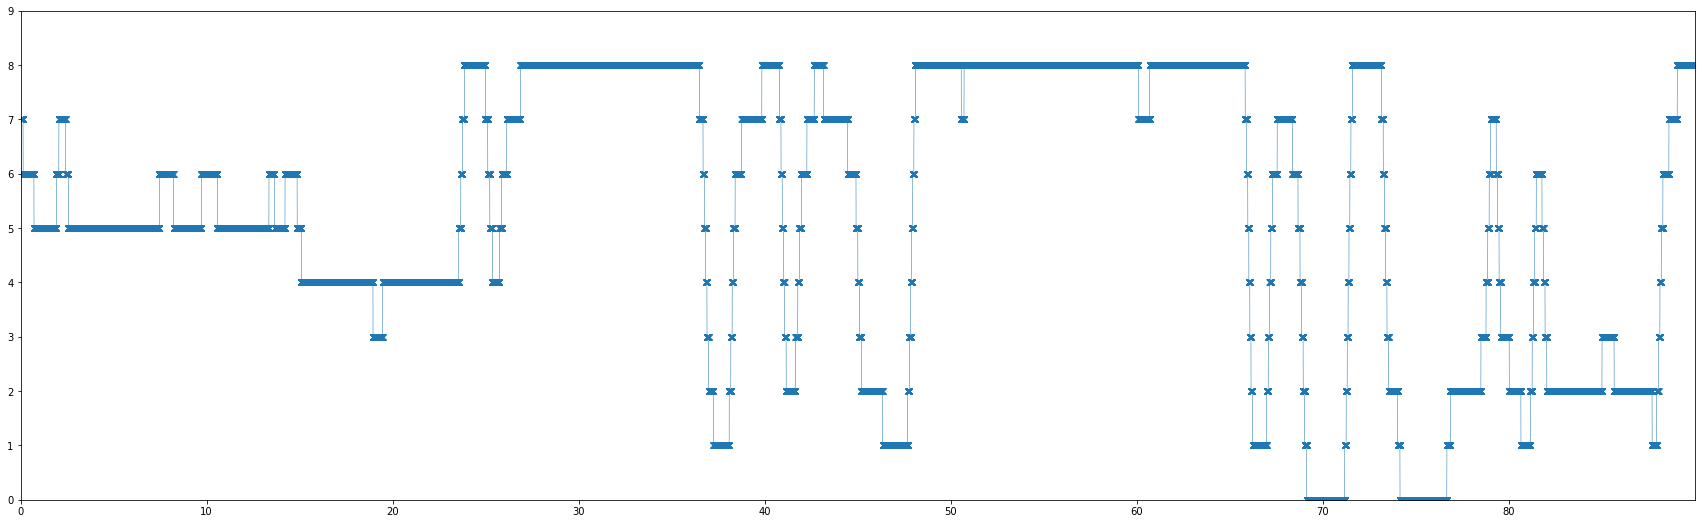

In [31]:
plt.plot(time_min,lab_smth,linewidth=0.5,marker="x")
plt.xlim(min(time_min),max(time_min))
plt.ylim(0,max(lab_smth))
plt.savefig('bsoid_labels_pose_ex.png')

In [27]:
import numpy as np

rCnt = int(input ("How many raster groups to import?"))
path = input("Enter path to rasterMap group:")
file = input("Enter base filename:")

for i in range(0,rCnt):
    df = pd.read_csv(path + "/" + file + '_grp' + str(i) + '.csv')
    if i==0:
        raster_sec=(df.Point/3.38)
        raster_min=raster_sec/60
        grp = np.zeros((rCnt,len(raster_min)))
    grp[i,:] = gaussian_filter1d(df.Value, sigma=67.6)

How many raster groups to import? 8
Enter path to rasterMap group: C:\Users\McCormick Lab\Documents\Python\neurobehavioral_cluster_alignment\3056_200924_E235_0
Enter base filename: 3056_200924_E235_0


In [28]:
#df = pd.read_csv(path + "/" + file + '_grp' + str(0) + '.csv')
#df
print(i)

7


In [29]:
j=0
j=int(j)
lab_sw=np.zeros((len(lab_smth)))
for i in range(0,len(lab_smth)-1):
    if lab_smth[i]!=lab_smth[j]:
        lab_sw[i]=1
    j=i

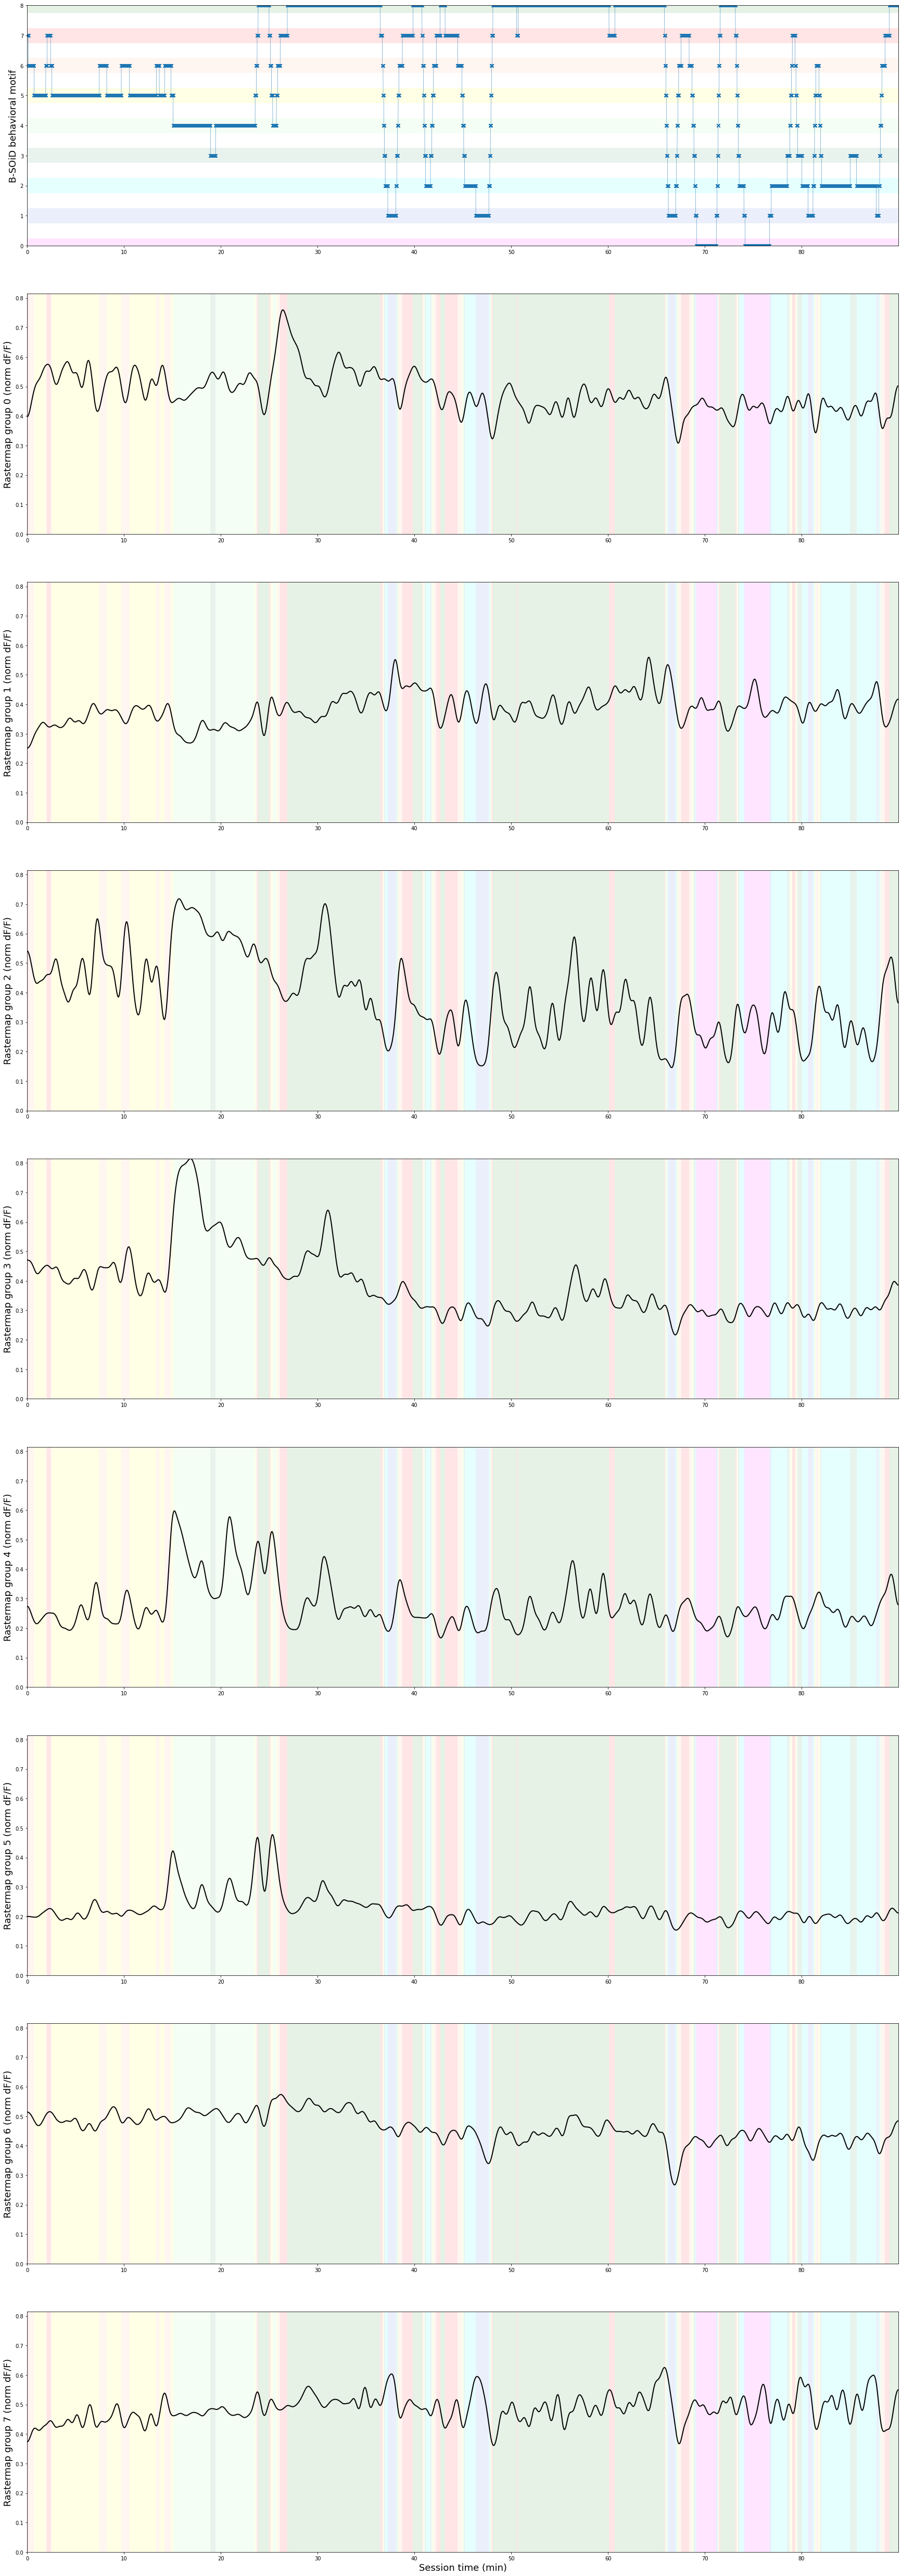

In [30]:
import math as m

fig = plt.figure(figsize=(30,10+(10*rCnt)))
#######################
axy = fig.add_subplot(1+rCnt,1,1)

plt.plot(time_min,lab_smth,linewidth=0.5,marker="x")
plt.ylabel('B-SOiD behavioral motif',fontsize=18)
axy.set_xlim(min(time_min),max(time_min))
axy.set_ylim(0,max(lab_smth))

for k in range(0,int(max(lab_smth)+1)):
    if k==0:
        color='magenta'
    elif k==1:
        color='royalblue'
    elif k==2:
        color='aqua'
    elif k==3:
        color='seagreen'
    elif k==4:
        color='palegreen'
    elif k==5:
        color='yellow'
    elif k==6:
        color='lightsalmon'
    elif k==7:
        color='red'
    elif k==8:
        color='green'
    box_y_min=(k/max(lab_smth))*max(lab_smth)-0.5
    box_y_max=((k+1)/max(lab_smth))*max(lab_smth)-0.5
    rectangle = plt.Rectangle((0,box_y_min+0.25), max(time_min), 0.5,fc=color,alpha=0.1)
    plt.gca().add_patch(rectangle)

#######################
y_super_max=0
for rasta_num in range(0,rCnt):
    if max(grp[rasta_num,:])>y_super_max:
        y_super_max=max(grp[rasta_num,:])
for rasta_num in range(0,rCnt):
    axz = fig.add_subplot(1+rCnt,1,2+rasta_num)

    plt.plot(raster_min,grp[rasta_num,:],linewidth=2.0,color='black')
    plt.xlim(min(time_min),max(time_min))
    plt.ylim(0,y_super_max)
    plt.ylabel('Rastermap group '+ str(rasta_num) + ' (norm dF/F)',fontsize=18)
    i=0
    j=0
    count=0
    for i in range(0,len(lab_smth)):
        if lab_sw[i]==1:
            count=count+1
            if i<len(lab_smth):
                if lab_smth[i-1]==0:
                    color='magenta'
                elif lab_smth[i-1]==1:
                    color='royalblue'
                elif lab_smth[i-1]==2:
                    color='aqua'
                elif lab_smth[i-1]==3:
                    color='seagreen'
                elif lab_smth[i-1]==4:
                    color='palegreen'
                elif lab_smth[i-1]==5:
                    color='yellow'
                elif lab_smth[i-1]==6:
                    color='lightsalmon'
                elif lab_smth[i-1]==7:
                    color='red'
                elif lab_smth[i-1]==8:
                    color='green'
                rectangle = plt.Rectangle((j/1800,0), (i/1800)-(j/1800), y_super_max,fc=color,alpha=0.1)
                plt.gca().add_patch(rectangle)
                j=i
        if i==len(lab_smth)-1:
            if lab_smth[i-1]==0:
                color='magenta'
            elif lab_smth[i-1]==1:
                color='royalblue'
            elif lab_smth[i-1]==2:
                color='aqua'
            elif lab_smth[i-1]==3:
                color='seagreen'
            elif lab_smth[i-1]==4:
                color='palegreen'
            elif lab_smth[i-1]==5:
                color='yellow'
            elif lab_smth[i-1]==6:
                color='lightsalmon'
            elif lab_smth[i-1]==7:
                color='red'
            elif lab_smth[i-1]==8:
                color='green'
            rectangle = plt.Rectangle((j/1800,0), (i/1800)-(j/1800), y_super_max,fc=color,alpha=0.1)
            plt.gca().add_patch(rectangle)
        if rasta_num==rCnt-1:
            plt.xlabel('Session time (min)',fontsize=18)
    plt.savefig(path+'\\bsoid_labels_3056_210924_1_raster_group'+str(rasta_num)+'.png')

In [30]:
import skvideo.io
import skvideo.datasets

file = input("Enter video filename:")
num_fr= int(input("Enter number of frames:"))

vid_file = str(path + "\\" + file)

videogen = skvideo.io.vreader(skvideo.datasets.vid_file())
for frame in range(0,num_fr):
        print(frame.shape)

Enter video filename:f
Enter number of frames:f


ValueError: invalid literal for int() with base 10: 'f'

In [1]:
import skvideo.io  
videodata = skvideo.io.vread('3056_200924_E235_1_concat_90min_crop.avi')

KeyboardInterrupt: 

In [88]:
import numpy as np
import cv2

file = input("Enter video filename:")
num_fr= int(input("Enter number of frames:"))

cap = cv2.VideoCapture('C:/Users/McCormick Lab/Documents/Python/neurobehavioral_cluster_alignment/3056_200924_E235_1')

while(cap.isOpened()):
    ret, frame = cap.read()
    cv2.imshow('frame',frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

Enter video filename: e
Enter number of frames: 5


error: OpenCV(4.5.3) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-efg5nnu5\opencv\modules\highgui\src\window.cpp:1268: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'


How many frames?200


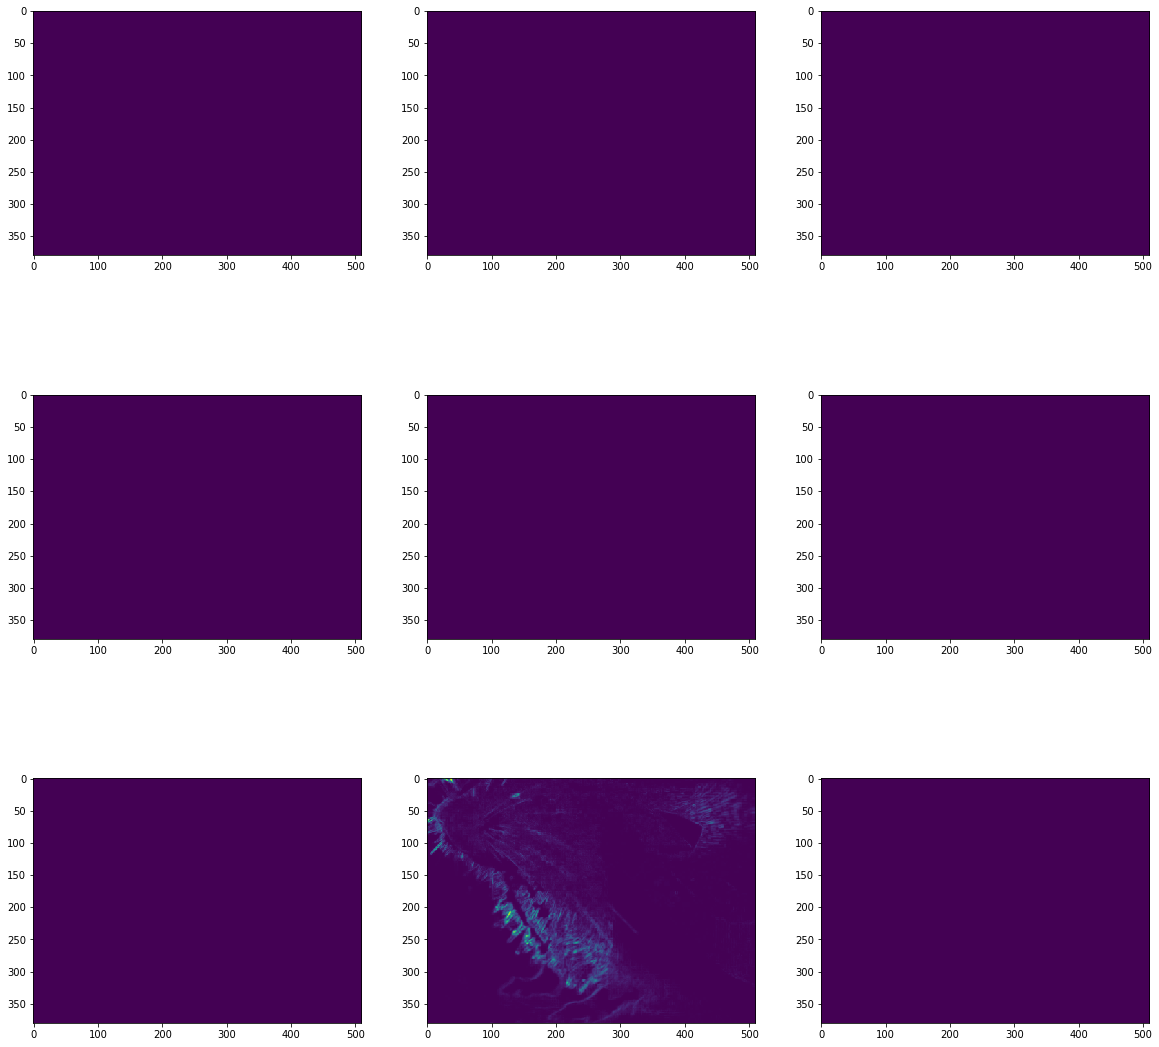

In [176]:
import imageio
import matplotlib.pyplot as plt
import imshowpair as imp
from PIL import Image
#img = Image.open('image.png').convert('L')
import numpy as np
np.set_printoptions(threshold=np.inf)

%matplotlib inline
low_memory=False

path='/mnt/d/B-SOID/3056_200924_E235_1_lft_Oct1521/_1/pngs/lft_cam_1_concat_90min_cropDLC_resnet50_3056_200924_E235_1_lft_Aug2221_THORAug22shuffle1_650000/'

usr_frm=int(input("How many frames?"))

#im_me=np.zeros((im0_dat.shape[0],im0_dat.shape[1],usr_frm),dtype=int)
im_me_norm=np.zeros((im0_dat.shape[0],im0_dat.shape[1],usr_frm),dtype=float)

#motif_me_sum=np.zeros((im0_dat.shape[0],im0_dat.shape[1],num_motifs),dtype=int)
motif_me_norm_sum=np.zeros((im0_dat.shape[0],im0_dat.shape[1],num_motifs),dtype=float)

#motif_me_avg=np.zeros((im1_dat.shape[0],im1_dat.shape[1],num_motifs),dtype=float)
#motif_me_norm_avg=np.zeros((im1_dat.shape[0],im1_dat.shape[1],num_motifs),dtype=float)

for frame_num in range(0,usr_frm-1):

    #im0 = imageio.imread(path+file0)
    #im1 = imageio.imread(path+file1)

    im0 = Image.open(path+'frame'+str(frame_num)+'.png').convert('L')
    im1 = Image.open(path+'frame'+str(frame_num+1)+'.png').convert('L')

    im0_dat = np.asarray(im0)
    im1_dat = np.asarray(im1)

    im0_real=np.zeros((im0_dat.shape[0],im0_dat.shape[1]),dtype=int)
    im1_real=np.zeros((im1_dat.shape[0],im1_dat.shape[1]),dtype=int)

    for i in range(0,im0_dat.shape[0]):
        for j in range(0,im0_dat.shape[1]):
            im0_real[i,j]=im0_dat[i,j]
            im1_real[i,j]=im1_dat[i,j]

    im2_dat =im0_dat-im1_dat
    im2_real=abs(im0_real-im1_real)

    im2_real_max=0
    for i in range(0,im0_dat.shape[0]):
        for j in range(0,im0_dat.shape[1]):
            if im2_real[i,j]>im2_real_max:
                im2_real_max=im2_real[i,j]
    im2_real_norm=im2_real/im2_real_max
    
    #im_me[:,:,frame_num]=im2_real
    im_me_norm[:,:,frame_num]=im2_real_norm
    
    if frame_num==usr_frm-2:
        #im_me[:,:,frame_num+1]=im2_real
        im_me_norm[:,:,frame_num+1]=im2_real_norm
    
    #fig, (ax1, ax2, ax3) = plt.subplots(1,3)
    #fig.set_size_inches(18.5, 10.5)

    #ax1.imshow(im_me[:,:,frame_num], interpolation='none',cmap='viridis')
    #ax2.imshow(im_me_norm[:,:,frame_num], interpolation='none',cmap='viridis')
    #ax3.imshow(im2_real, interpolation='none',cmap='viridis')

for frame_num in range(0,usr_frm):
    if frame_num>0:
        #motif_me_sum[:,:,lab_raw[frame_num-1]]=motif_me_sum[:,:,lab_raw[frame_num-1]]+im_me[:,:,frame_num-1]
        motif_me_norm_sum[:,:,lab_raw[frame_num-1]]=motif_me_norm_sum[:,:,lab_raw[frame_num-1]]+im_me_norm[:,:,frame_num-1]
    else:
        #motif_me_sum[:,:,lab_raw[frame_num]]=motif_me_sum[:,:,lab_raw[frame_num]]+im_me[:,:,frame_num]
        motif_me_norm_sum[:,:,lab_raw[frame_num]]=motif_me_norm_sum[:,:,lab_raw[frame_num]]+im_me_norm[:,:,frame_num]
    
#for motif in range(0,num_motifs):
#    motif_me_avg[:,:,motif]=motif_me_sum[:,:,motif]/motif_cnt[motif]
#    motif_me_norm_avg[:,:,motif]=motif_me_norm_sum[:,:,motif]/motif_cnt[motif]
    
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3,3)
fig.set_size_inches(20,20)

ax1.imshow(motif_me_norm_sum[:,:,0], interpolation='none',cmap='viridis')
ax2.imshow(motif_me_norm_sum[:,:,1], interpolation='none',cmap='viridis')
ax3.imshow(motif_me_norm_sum[:,:,2], interpolation='none',cmap='viridis')
ax4.imshow(motif_me_norm_sum[:,:,3], interpolation='none',cmap='viridis')
ax5.imshow(motif_me_norm_sum[:,:,4], interpolation='none',cmap='viridis')
ax6.imshow(motif_me_norm_sum[:,:,5], interpolation='none',cmap='viridis')
ax7.imshow(motif_me_norm_sum[:,:,6], interpolation='none',cmap='viridis')
ax8.imshow(motif_me_norm_sum[:,:,7], interpolation='none',cmap='viridis')
ax9.imshow(motif_me_norm_sum[:,:,8], interpolation='none',cmap='viridis')

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture('3056_200924_E235_1_concat_90min_crop.avi')
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

fc = 0
ret = True

while (fc < 3  and ret):
    ret, buf[fc] = cap.read()
    fc += 1

cap.release()

cv2.namedWindow('frame 10')
cv2.imshow('frame 10', buf[9])

cv2.waitKey(0)

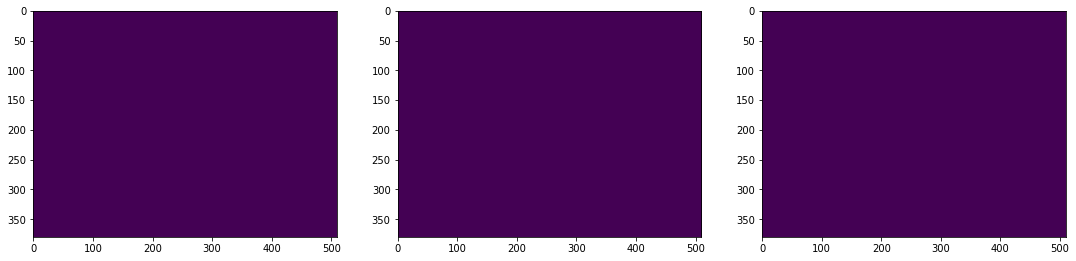

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(18.5, 10.5)

ax1.imshow(motif_me_norm_sum[:,:,0], interpolation='none',cmap='viridis')
ax2.imshow(motif_me_norm[:,:,1], interpolation='none',cmap='viridis')
ax3.imshow(motif_me_norm[:,:,4], interpolation='none',cmap='viridis')

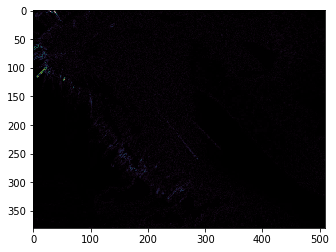

In [55]:
plt.imshow(im2_real,cmap='cubehelix')
plt.show()

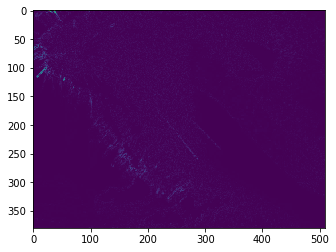

In [54]:
plt.imshow(im2_real_norm,cmap='viridis')
plt.show()

In [18]:
#im2_real_norm

In [76]:
frame_num

22908

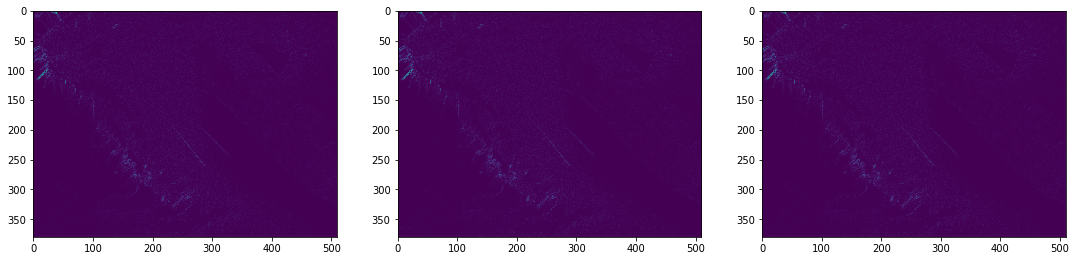

In [77]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3)
fig.set_size_inches(18.5, 10.5)

ax1.imshow(im_me[:,:,10000], interpolation='none',cmap='viridis')
ax2.imshow(im_me[:,:,20000], interpolation='none',cmap='viridis')
ax3.imshow(im_me[:,:,22907], interpolation='none',cmap='viridis')

In [100]:
max(time_min)

89.99944444444444

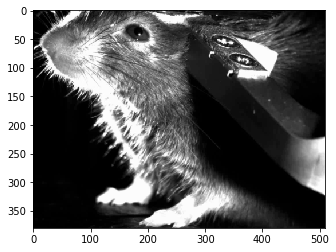

In [15]:
plt.imshow(im0, interpolation='none',cmap='viridis')

In [107]:
len(raster_min)

18252

In [12]:
im0 = Image.open(path+'frame'+str(frame_num)+'.png').convert('L')

In [13]:
im0_dat = np.asarray(im0)

In [19]:
df.Labels

AttributeError: 'DataFrame' object has no attribute 'Labels'

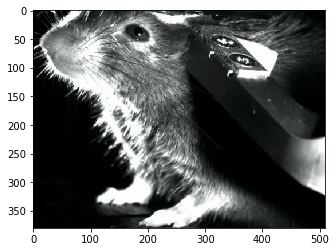

In [49]:
plt.imshow(im0_dat, interpolation='none')
plt.show()

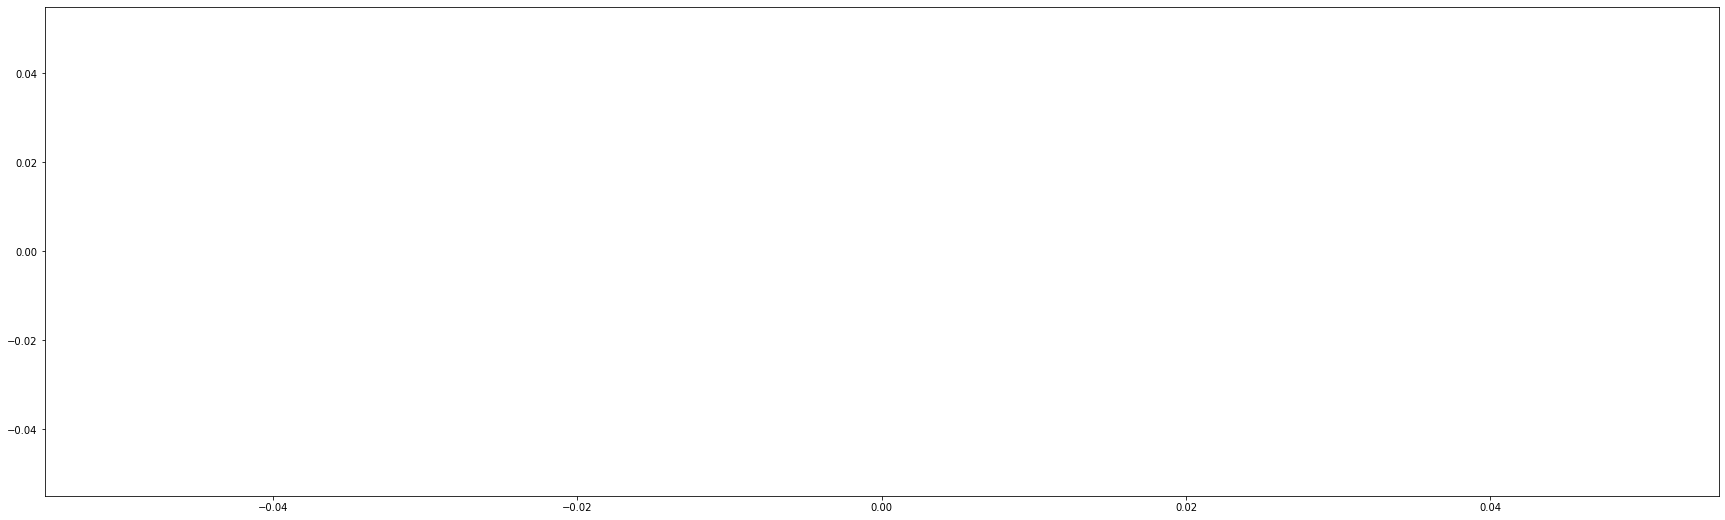

In [19]:
plt.plot(grp[1])

In [121]:
im_me[:,:,frame_num]=im2_real
im_me_norm[:,:,frame_num]=im2_real_norm

In [122]:
for frame_num in range(0,usr_frm):
    if frame_num>0:
        motif_me_sum[:,:,lab_raw[frame_num-1]]=motif_me_sum[:,:,lab_raw[frame_num-1]]+im_me[:,:,frame_num-1]
        motif_me_norm_sum[:,:,lab_raw[frame_num-1]]=motif_me_norm_sum[:,:,lab_raw[frame_num-1]]+im_me_norm[:,:,frame_num-1]
    else:
        motif_me_sum[:,:,lab_raw[frame_num]]=motif_me_sum[:,:,lab_raw[frame_num]]+im_me[:,:,frame_num]
        motif_me_norm_sum[:,:,lab_raw[frame_num]]=motif_me_norm_sum[:,:,lab_raw[frame_num]]+im_me_norm[:,:,frame_num]
    
for motif in range(0,num_motifs):
    motif_me_avg[:,:,motif]=motif_me_sum[:,:,motif]/motif_cnt[motif]
    motif_me_norm_avg[:,:,motif]=motif_me_norm_sum[:,:,motif]/motif_cnt[motif]
    
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3,3)
fig.set_size_inches(20,20)

ax1.imshow(motif_me_sum[:,:,0], interpolation='none',cmap='viridis')
ax2.imshow(motif_me_sum[:,:,1], interpolation='none',cmap='viridis')
ax3.imshow(motif_me_sum[:,:,2], interpolation='none',cmap='viridis')
ax4.imshow(motif_me_sum[:,:,3], interpolation='none',cmap='viridis')
ax5.imshow(motif_me_sum[:,:,4], interpolation='none',cmap='viridis')
ax6.imshow(motif_me_sum[:,:,5], interpolation='none',cmap='viridis')
ax7.imshow(motif_me_sum[:,:,6], interpolation='none',cmap='viridis')
ax8.imshow(motif_me_sum[:,:,7], interpolation='none',cmap='viridis')
ax9.imshow(motif_me_sum[:,:,8], interpolation='none',cmap='viridis')

KeyboardInterrupt: 

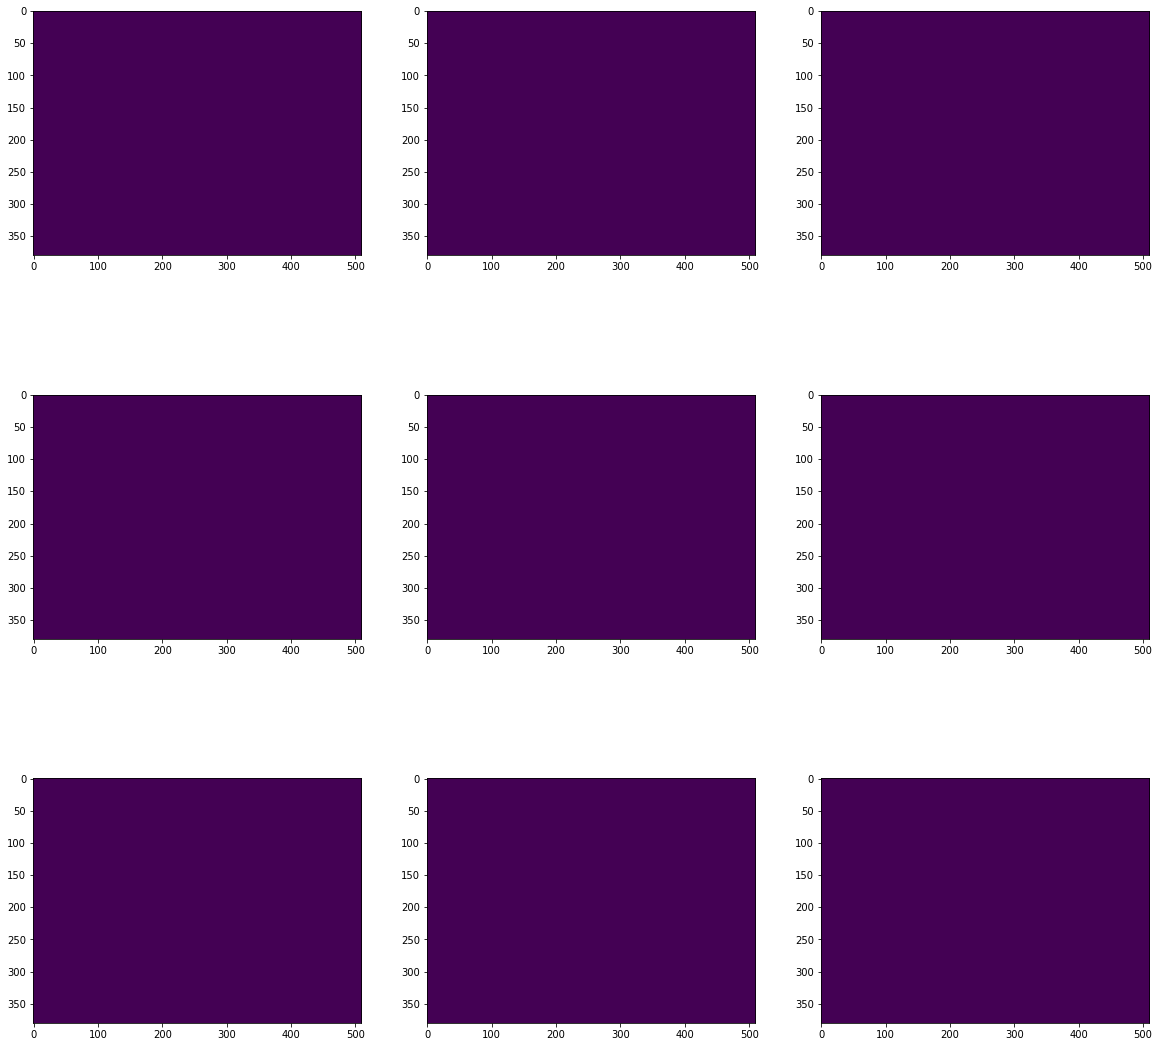

In [177]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3,3)
fig.set_size_inches(20,20)

ax1.imshow(motif_me_sum[:,:,0], interpolation='none',cmap='viridis')
ax2.imshow(motif_me_sum[:,:,1], interpolation='none',cmap='viridis')
ax3.imshow(motif_me_sum[:,:,2], interpolation='none',cmap='viridis')
ax4.imshow(motif_me_sum[:,:,3], interpolation='none',cmap='viridis')
ax5.imshow(motif_me_sum[:,:,4], interpolation='none',cmap='viridis')
ax6.imshow(motif_me_sum[:,:,5], interpolation='none',cmap='viridis')
ax7.imshow(motif_me_sum[:,:,6], interpolation='none',cmap='viridis')
ax8.imshow(motif_me_sum[:,:,7], interpolation='none',cmap='viridis')
ax9.imshow(motif_me_sum[:,:,8], interpolation='none',cmap='viridis')

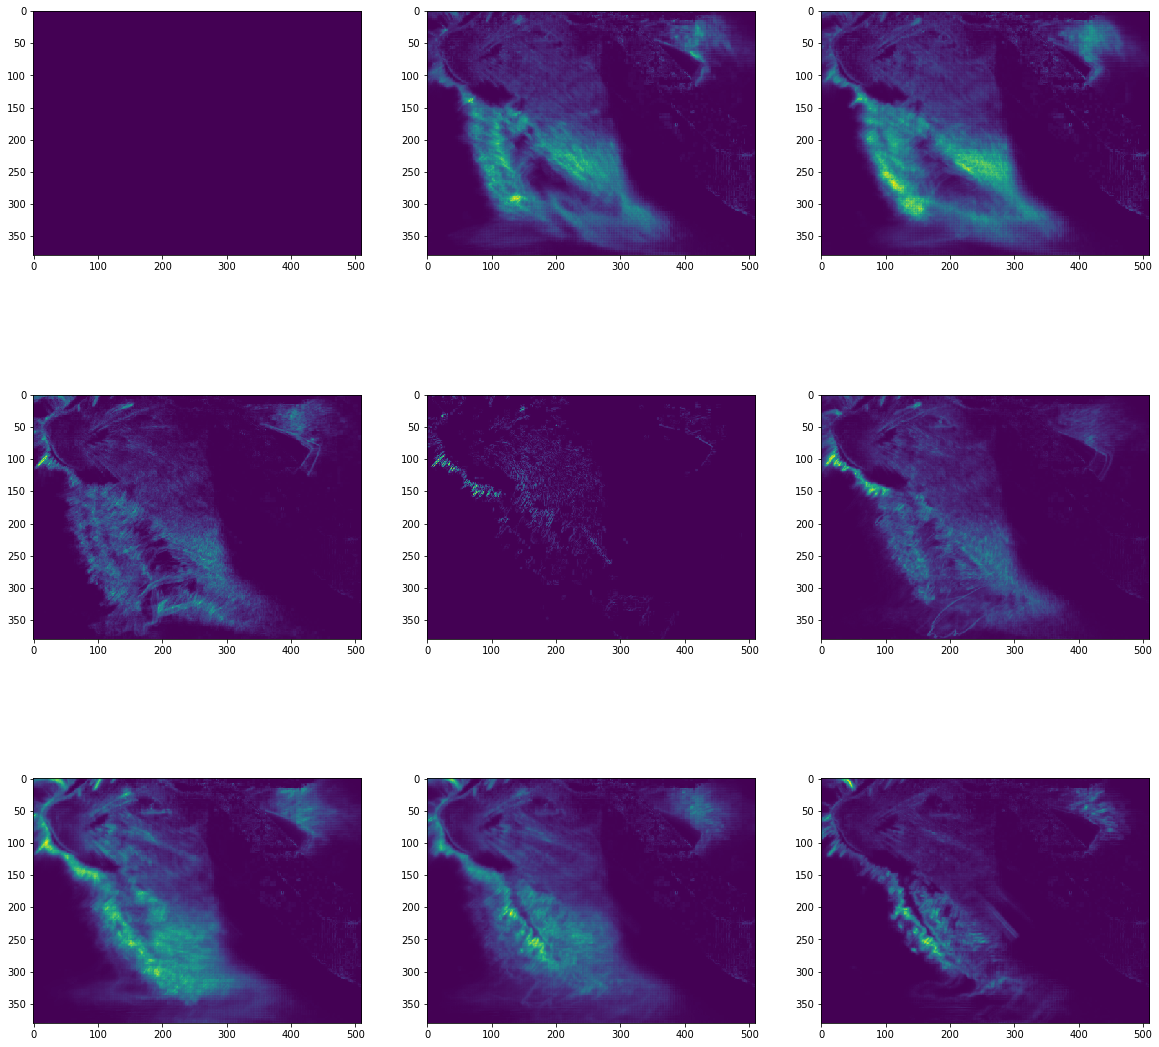

In [128]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3,3)
fig.set_size_inches(20,20)

ax1.imshow(motif_me_norm_sum[:,:,0], interpolation='none',cmap='viridis')
ax2.imshow(motif_me_norm_sum[:,:,1], interpolation='none',cmap='viridis')
ax3.imshow(motif_me_norm_sum[:,:,2], interpolation='none',cmap='viridis')
ax4.imshow(motif_me_norm_sum[:,:,3], interpolation='none',cmap='viridis')
ax5.imshow(motif_me_norm_sum[:,:,4], interpolation='none',cmap='viridis')
ax6.imshow(motif_me_norm_sum[:,:,5], interpolation='none',cmap='viridis')
ax7.imshow(motif_me_norm_sum[:,:,6], interpolation='none',cmap='viridis')
ax8.imshow(motif_me_norm_sum[:,:,7], interpolation='none',cmap='viridis')
ax9.imshow(motif_me_norm_sum[:,:,8], interpolation='none',cmap='viridis')

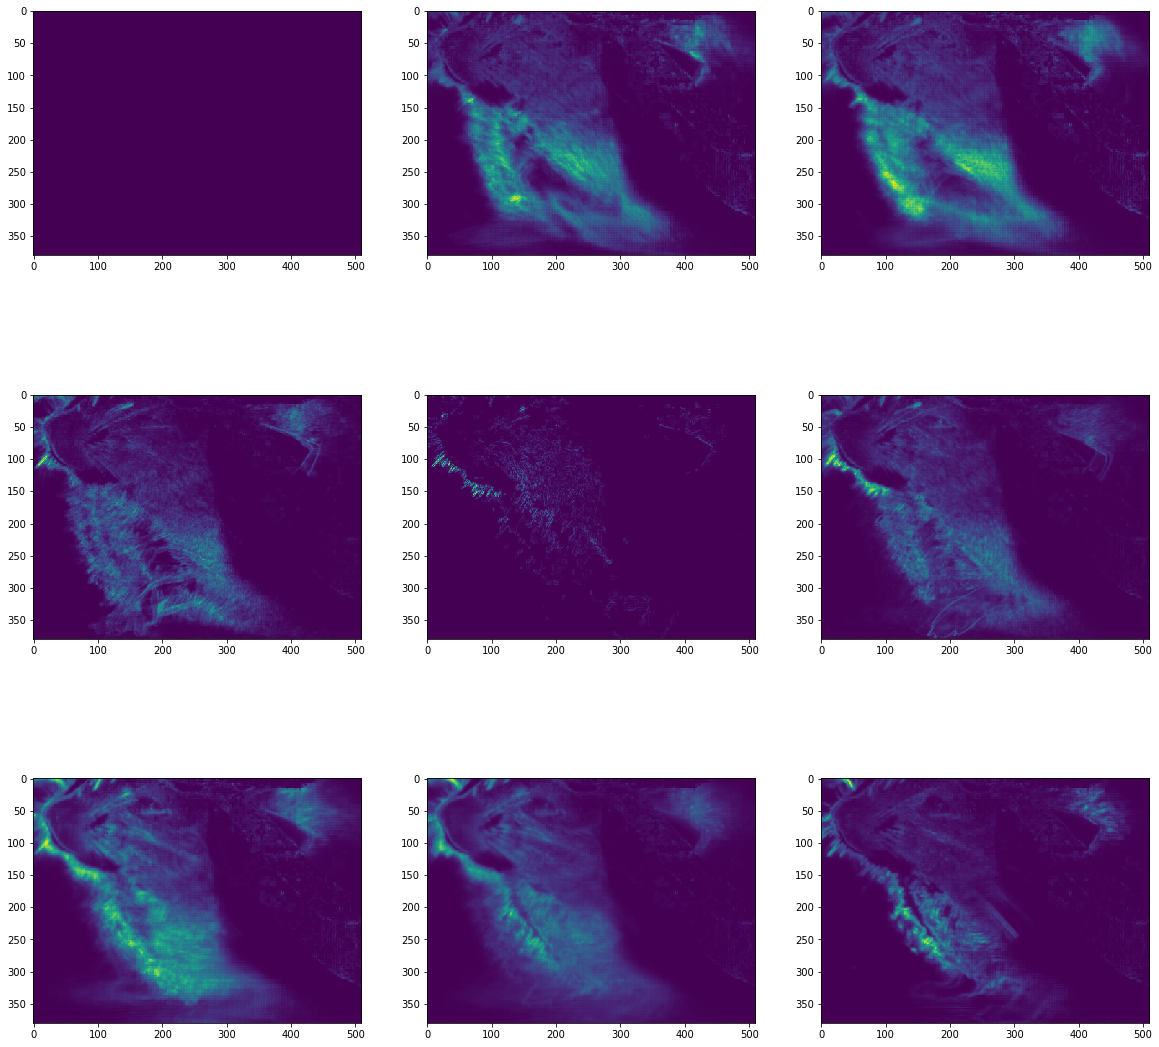

In [173]:
fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3,3)
fig.set_size_inches(20,20)

ax1.imshow(motif_me_norm_sum[:,:,0], interpolation='none',cmap='viridis')
ax2.imshow(motif_me_norm_sum[:,:,1], interpolation='none',cmap='viridis')
ax3.imshow(motif_me_norm_sum[:,:,2], interpolation='none',cmap='viridis')
ax4.imshow(motif_me_norm_sum[:,:,3], interpolation='none',cmap='viridis')
ax5.imshow(motif_me_norm_sum[:,:,4], interpolation='none',cmap='viridis')
ax6.imshow(motif_me_norm_sum[:,:,5], interpolation='none',cmap='viridis')
ax7.imshow(motif_me_norm_sum[:,:,6], interpolation='none',cmap='viridis')
ax8.imshow(motif_me_norm_sum[:,:,7], interpolation='none',cmap='viridis')
ax9.imshow(motif_me_norm_sum[:,:,8], interpolation='none',cmap='viridis')

In [152]:
num_motifs

9

In [201]:
max(raster_min)

89.99506903353058

In [129]:
frame_num

45071

In [41]:
for i in range(0,45071):
    

7

In [50]:
num_motifs

9

In [1]:
#motif_me_norm_sum[:,:,7]

In [151]:
motif_num

NameError: name 'motif_num' is not defined

/home/evicker2/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2253: RuntimeWarning: divide by zero encountered in true_divide
  return (a - mns) / sstd
/home/evicker2/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


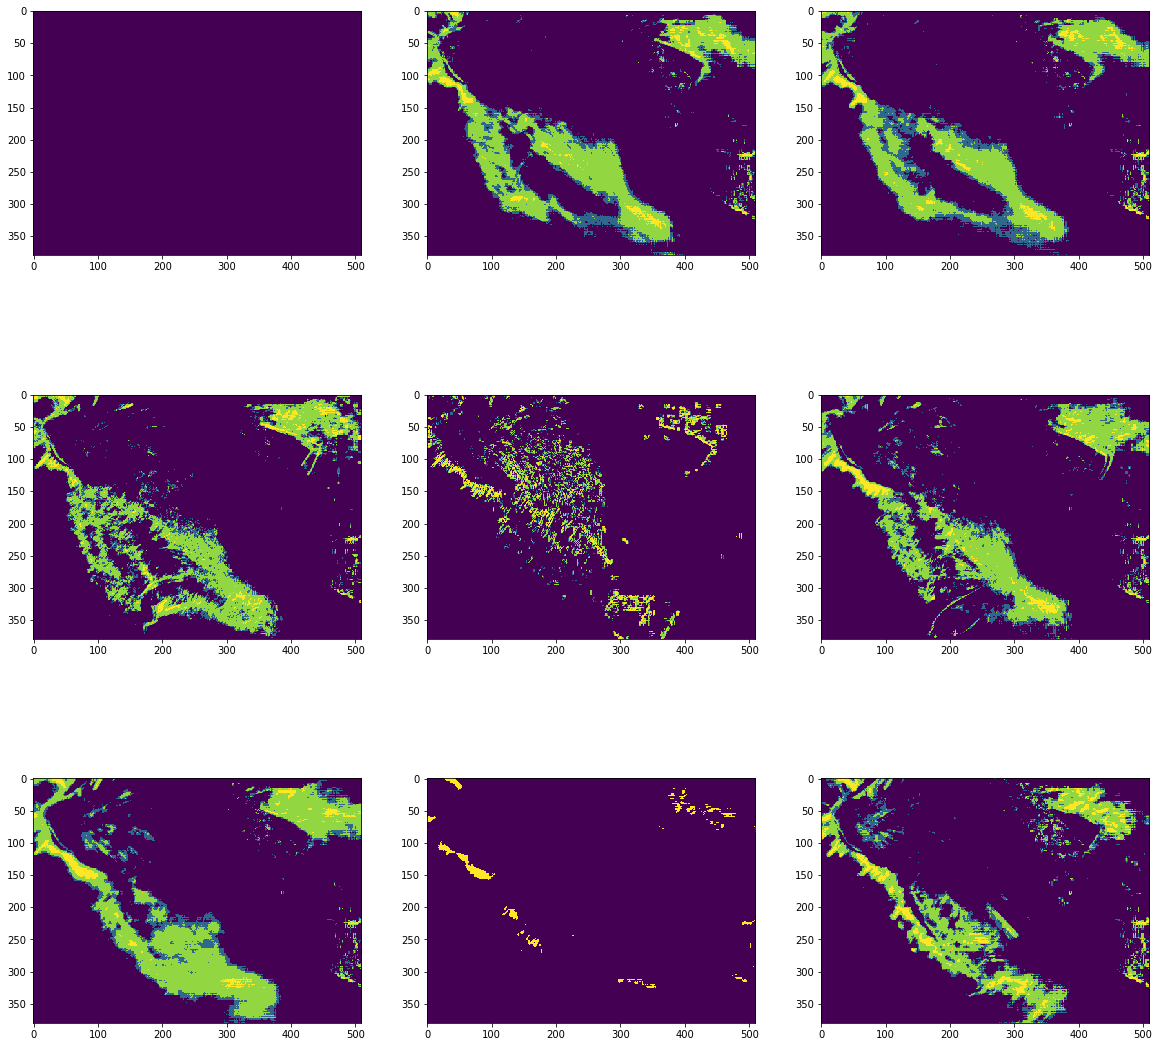

In [170]:
from scipy import stats
grp_thresh=np.zeros((num_motifs,380,510),dtype=float)
grp_zScore=np.zeros((num_motifs,380,510),dtype=float)

for k in range(0,num_motifs):
    grp_thresh[k,:,:]=motif_me_norm_sum[:,:,k]

    grp_zScore[k,:,:]=stats.zscore(grp_thresh[k,:,:])

    for i in range(0,380):
        for j in range(0,510):
            if grp_zScore[k,i,j]>3:
                grp_thresh[k,i,j]=256 
            elif grp_zScore[k,i,j]<=3 and grp_zScore[k,i,j]>1:
                grp_thresh[k,i,j]=214
            elif grp_zScore[k,i,j]<=1 and grp_zScore[k,i,j]>0.5:
                grp_thresh[k,i,j]=86
            else:
                grp_thresh[k,i,j]=0

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3,3)
fig.set_size_inches(20,20)

ax1.imshow(grp_thresh[0,:,:], interpolation='none',cmap='viridis')
ax2.imshow(grp_thresh[1,:,:], interpolation='none',cmap='viridis')
ax3.imshow(grp_thresh[2,:,:], interpolation='none',cmap='viridis')
ax4.imshow(grp_thresh[3,:,:], interpolation='none',cmap='viridis')
ax5.imshow(grp_thresh[4,:,:], interpolation='none',cmap='viridis')
ax6.imshow(grp_thresh[5,:,:], interpolation='none',cmap='viridis')
ax7.imshow(grp_thresh[6,:,:], interpolation='none',cmap='viridis')
ax8.imshow(grp_thresh[7,:,:], interpolation='none',cmap='viridis')
ax9.imshow(grp_thresh[8,:,:], interpolation='none',cmap='viridis')

/home/evicker2/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2253: RuntimeWarning: divide by zero encountered in true_divide
  return (a - mns) / sstd
/home/evicker2/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


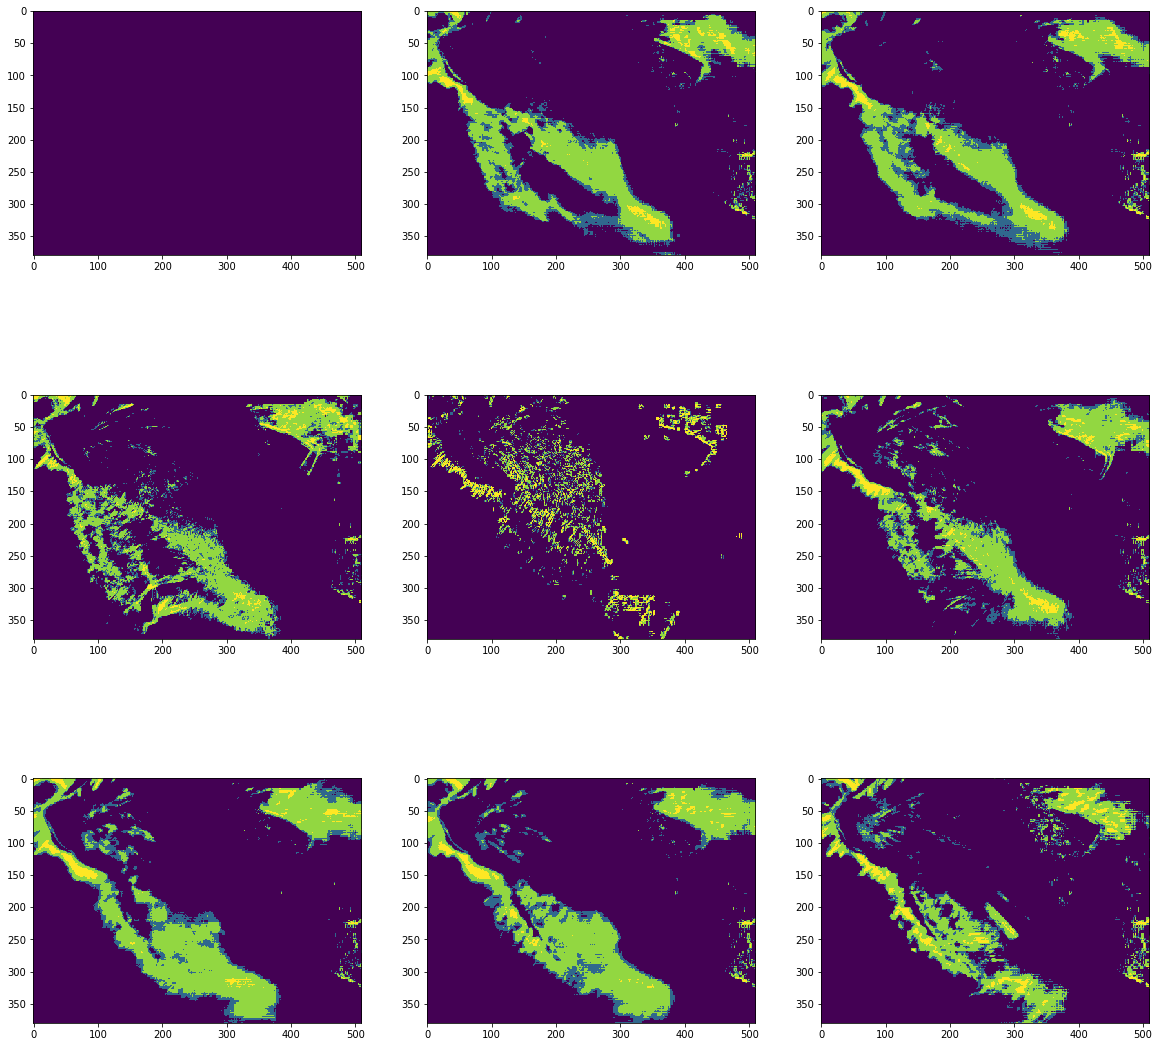

In [174]:
from scipy import stats
grp_thresh=np.zeros((num_motifs,380,510),dtype=float)
grp_zScore=np.zeros((num_motifs,380,510),dtype=float)

for k in range(0,num_motifs):
    grp_thresh[k,:,:]=motif_me_sum[:,:,k]

    grp_zScore[k,:,:]=stats.zscore(grp_thresh[k,:,:])

    for i in range(0,380):
        for j in range(0,510):
            if grp_zScore[k,i,j]>3:
                grp_thresh[k,i,j]=256 
            elif grp_zScore[k,i,j]<=3 and grp_zScore[k,i,j]>1:
                grp_thresh[k,i,j]=214
            elif grp_zScore[k,i,j]<=1 and grp_zScore[k,i,j]>0.5:
                grp_thresh[k,i,j]=86
            else:
                grp_thresh[k,i,j]=0

fig, ((ax1, ax2, ax3),(ax4, ax5, ax6),(ax7, ax8, ax9)) = plt.subplots(3,3)
fig.set_size_inches(20,20)

ax1.imshow(grp_thresh[0,:,:], interpolation='none',cmap='viridis')
ax2.imshow(grp_thresh[1,:,:], interpolation='none',cmap='viridis')
ax3.imshow(grp_thresh[2,:,:], interpolation='none',cmap='viridis')
ax4.imshow(grp_thresh[3,:,:], interpolation='none',cmap='viridis')
ax5.imshow(grp_thresh[4,:,:], interpolation='none',cmap='viridis')
ax6.imshow(grp_thresh[5,:,:], interpolation='none',cmap='viridis')
ax7.imshow(grp_thresh[6,:,:], interpolation='none',cmap='viridis')
ax8.imshow(grp_thresh[7,:,:], interpolation='none',cmap='viridis')
ax9.imshow(grp_thresh[8,:,:], interpolation='none',cmap='viridis')

In [2]:
#grp_zScore[7,:,:]

In [76]:
im_me[:,:frame_num]

array([], shape=(380, 0, 3), dtype=int64)

In [3]:
#im_me[:,:,1]

In [4]:
#im2_real

In [82]:
im2_real_max

135

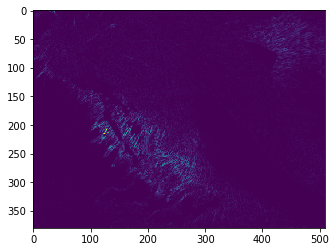

In [84]:
plt.imshow(im2_real/im2_real_max)

In [97]:
im_me_norm[:,:,2]=im2_real_norm

In [5]:
#im_me_norm[:,:,2]

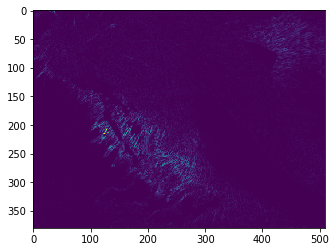

In [92]:
plt.imshow(im2_real_norm)

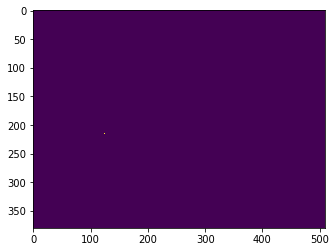

In [90]:
plt.imshow(im_me_norm[:,:,2])

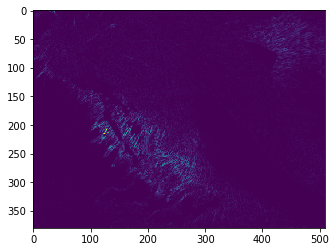

In [91]:
plt.imshow(im_me[:,:,2])

In [6]:
#motif_me_norm_sum[:,:,lab_raw[1]]

In [101]:
motif_me_sum.shape

(380, 510, 9)

In [7]:
#motif_me_sum[:,:,lab_raw[frame_num-1]]

In [105]:
frame_num

2

In [8]:
#lab_raw[40000:41000]

In [9]:
#motif_me_sum[:,:,7]